In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from tqdm.notebook import tqdm

from definitions import ROOT_DIR

In [2]:
results_dir = Path(ROOT_DIR, 'results')
raw_data = {}

for run_path in results_dir.iterdir():
    list_str = run_path.name.split('_')
    action_dim = int(list_str[-1])
    raw_data[action_dim] = []
    
    for seed_path in run_path.iterdir():
        data = np.load(seed_path, allow_pickle=True).item()
        raw_data[action_dim].append(data['regret'])
    raw_data[action_dim] = np.array(raw_data[action_dim])

In [3]:
raw_data[80].shape

(3, 10000000)

In [4]:
cum_regret_data = {}

for dim, regrets in raw_data.items():
    cum_regret_data[dim] = np.cumsum(regrets, axis=1)

In [5]:
n = 100
avg_last_n = {}

for dim, cum_reg in cum_regret_data.items():
    avg_last_n[dim] = cum_reg[:, -1]

In [6]:
sorted_max_overs = sorted(avg_last_n.items(), key=lambda x: x[0])

xs = []
ys = []
std_errs = []
for bs, tu in sorted_max_overs:
    mean = np.mean(tu)
    std_err = np.std(tu) / tu.shape[0]
    xs.append(bs)
    ys.append(mean)
    std_errs.append(std_err)

xs, ys, std_errs = np.array(xs), np.array(ys), np.array(std_errs)

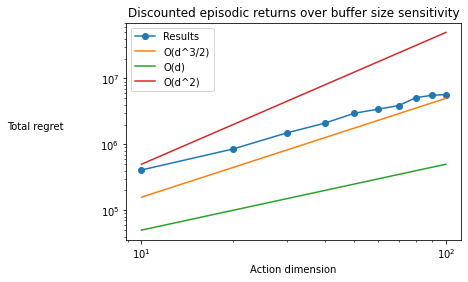

In [22]:
fig, ax = plt.figure(), plt.axes()

ax.loglog(xs, ys, marker="o", label="Results")
ax.loglog(xs, 5000 * np.power(xs, 3/2), label="O(d^3/2)")
ax.loglog(xs, 5000 * xs, label="O(d)")
ax.loglog(xs, 5000 * np.power(xs, 2), label="O(d^2)")

# ax.errorbar(xs, ys, yerr=std_errs)

ax.set_xlabel('Action dimension')
ax.set_ylabel(f"Total regret", rotation=0, labelpad=65)
ax.set_title(f'Discounted episodic returns over buffer size sensitivity')
ax.legend()


In [24]:
def half_eff_prob(dist, max_dist):
    return (1 + np.power(2.0, -dist / max_dist)) * 0.5

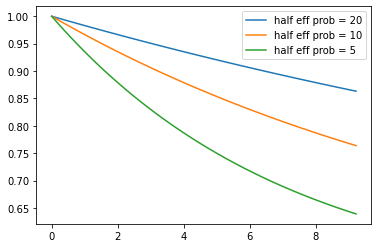

In [26]:
x = np.linspace(0, np.sqrt(85))
y_curr = half_eff_prob(x, 20)
y_new = half_eff_prob(x, 10)
fig, ax = plt.figure(), plt.axes()

ax.plot(x, y_curr, label="half eff prob = 20")
ax.plot(x, y_new, label="half eff prob = 10")
ax.plot(x, half_eff_prob(x, 5), label="half eff prob = 5")

ax.legend()